# Backprop KMNIST Practice
> Without peeking

In [ ]:
import numpy as np
import torch
import torchvision
from matplotlib import pyplot
from matplotlib.pyplot import plot as plt
from fastcore.all import test_close, test_eq

/Users/anubhavmaity/mambaforge/envs/fastai/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
torch.manual_seed(42)

<torch._C.Generator>

## Download KMNIST Dataset

In [ ]:
data_train = torchvision.datasets.KMNIST(root='data', download=True)
x_train, y_train = data_train.train_data, data_train.train_labels

data_test = torchvision.datasets.KMNIST(root='data', train=False, download=True)
x_test, y_test = data_test.test_data, data_test.test_labels

/Users/anubhavmaity/mambaforge/envs/fastai/lib/python3.9/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/Users/anubhavmaity/mambaforge/envs/fastai/lib/python3.9/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/Users/anubhavmaity/mambaforge/envs/fastai/lib/python3.9/site-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/Users/anubhavmaity/mambaforge/envs/fastai/lib/python3.9/site-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


<matplotlib.image.AxesImage>

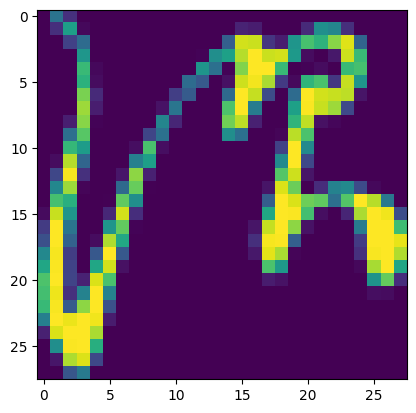

In [ ]:
pyplot.imshow(x_test[0])

## KMNIST Data Analysis and Processing

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

(torch.Size([60000, 28, 28]),
 torch.Size([60000]),
 torch.Size([10000, 28, 28]),
 torch.Size([10000]))

Flatten the `x_train` and `x_test`. Convert them to floating points

In [ ]:
x_train, x_test = x_train.flatten(1) / 255., x_test.flatten(1) / 255.

In [ ]:
x_train.shape, x_test.shape

(torch.Size([60000, 784]), torch.Size([10000, 784]))

In [ ]:
n = y_train.shape[0]
c = y_train.max().numpy() + 1
nh = 50 # number of hidden layers
n, c

(60000, 10)

## Weights & Biases

In [ ]:
w1 = torch.randn(x_train.shape[1], nh)
b1 = torch.zeros(nh)
w2 = torch.randn(nh, 1)
b2 = torch.zeros(1)

In [ ]:
w1.shape, b1.shape, w2.shape, b2.shape

(torch.Size([784, 50]), torch.Size([50]), torch.Size([50, 1]), torch.Size([1]))

## Forward Pass

In [ ]:
def forward_pass(x_train, params):
    w1, b1, w2, b2 = params
    output_1 = x_train @ w1 + b1 # first linear layer
    output_2 = torch.clamp(output_1, min=0) # relu layer
    return output_2 @ w2 + b2 # second linear layer

In [ ]:
params = w1, b1, w2, b2

In [ ]:
y_pred = forward_pass(x_train, params)
y_pred.shape

torch.Size([60000, 1])

## Loss: MSE

In [ ]:
y_train.shape, y_pred.shape

(torch.Size([60000]), torch.Size([60000, 1]))

In [ ]:
( (y_pred - y_train[:, None]) **2 ).mean()

tensor(4160.4277)

In [ ]:
def mse_loss(y_pred, y_train):
    return ( (y_pred - y_train[:, None]) **2 ).mean()

## Derivatives

In [ ]:
l1 = x_train @ w1 + b1

In [ ]:
l1.shape

torch.Size([60000, 50])

In [ ]:
l2 = torch.clamp(l1, min=0)

In [ ]:
l2.shape

torch.Size([60000, 50])

In [ ]:
l3 = l2 @ w2 + b2

In [ ]:
l3.shape

torch.Size([60000, 1])

In [ ]:
diff = (l3 - y_train[:, None]) 

#### Derivative of `mse_loss` with respect to `l3`

In [ ]:
l3.g = 2 * diff / l3.shape[0] 

In [ ]:
assert l3.g.shape == l3.shape

#### Derivative of `loss` with respect to `l2`

In [ ]:
l3.g.shape

torch.Size([60000, 1])

In [ ]:
w2.shape

torch.Size([50, 1])

In [ ]:
l2.shape

torch.Size([60000, 50])

In [ ]:
l2.g = l3.g @ w2.T

In [ ]:
assert l2.g.shape == l2.shape

#### Derivative of `loss` with respect to `w2`

In [ ]:
w2.shape

torch.Size([50, 1])

In [ ]:
l1.shape

torch.Size([60000, 50])

In [ ]:
l2.g.shape

torch.Size([60000, 50])

In [ ]:
w2.g = l2.T @ l3.g

In [ ]:
assert w2.g.shape == w2.shape

#### Derivative of `loss` with respect to `b2`

In [ ]:
b2.shape

torch.Size([1])

In [ ]:
l3.g.shape

torch.Size([60000, 1])

In [ ]:
b2.g = l3.g.sum(0)

In [ ]:
assert b2.g.shape == b2.shape

#### Derivative of `loss` with respect to `l1`

In [ ]:
l2.g.shape

torch.Size([60000, 50])

In [ ]:
l1.shape

torch.Size([60000, 50])

In [ ]:
l1.g = (l1 > 0).float() * l2.g

In [ ]:
assert l1.g.shape == l1.shape

#### Derivative of `loss` with respect to `w1`

In [ ]:
w1.shape

torch.Size([784, 50])

In [ ]:
x_train.shape

torch.Size([60000, 784])

In [ ]:
l1.g.shape

torch.Size([60000, 50])

In [ ]:
w1.g = x_train.T @ l1.g

In [ ]:
assert w1.shape == w1.g.shape

#### Derivative of `loss` with respect to `x_train`


In [ ]:
x_train.shape

torch.Size([60000, 784])

In [ ]:
l1.g.shape

torch.Size([60000, 50])

In [ ]:
w1.shape

torch.Size([784, 50])

In [ ]:
x_train.g = l1.g @ w1.T

In [ ]:
assert x_train.g.shape == x_train.shape

#### Derivative of `loss` with respect to `b1`

In [ ]:
b1.shape

torch.Size([50])

In [ ]:
l1.g.shape

torch.Size([60000, 50])

In [ ]:
b1.g = l1.g.sum(0)

In [ ]:
assert b1.shape == b1.g.shape

## Forward and backward pass

In [ ]:
def forward_backward_pass(x_train, y_train, params):
    # forward pass
    w1, b1, w2, b2 = params
    l1 = x_train @ w1 + b1
    l2 = torch.clamp(l1, min=0)
    l3 = l2 @ w2 + b2
    loss = mse_loss( l3, y_train )
    
    # backward pass (refering to the above computation)
    
    ## derivative of loss with respect to l3
    diff = ( l3 - y_train[:, None] )
    l3.g = 2 * diff / l3.shape[0]
    
    
    
    ## derivative of 2nd linear layer
    
    ### derivative of loss with respect to l2
    l2.g = l3.g @ w2.T
    
    ### derivative of loss with respect to w2
    w2.g = l2.T @ l3.g
    
    ### derivative of loss with respect to b2
    b2.g = l3.g.sum(0)
    
    
    
    ## derivative of relu layer
    
    ### derivative of loss with respect to l1 
    l1.g = (l1 > 0).float() * l2.g
    
    
    
    ## derivative of 1st linear layer
    
    ### derivative of loss with respect to x_train
    x_train.g = l1.g @ w1.T
    
    ### derivative of loss with respect to w1
    w1.g = x_train.T @ l1.g
    
    ### derivative of loss with respect to b1
    b1.g = l1.g.sum(0)
    
    return loss

In [ ]:
forward_backward_pass(x_train, y_train, params)

tensor(4160.4277)

### Refactor the gradient computation of linear layer

In [ ]:
def compute_linear_layer_gradients(inp, out, w, b):
    # derivative of loss with respect to input
    inp.g = out.g @ w.T
    
    # derivative of loss with respect to w
    w.g = inp.T @ out.g
    
    # derivative of loss with respect to b
    b.g = out.g.sum(0)

In [ ]:
def forward_backward_pass(x_train, y_train, params):
    # forward pass
    w1, b1, w2, b2 = params
    l1 = x_train @ w1 + b1
    l2 = torch.clamp(l1, min=0)
    l3 = l2 @ w2 + b2
    loss = mse_loss(l3, y_train)
    
    # derivative of loss with respect to l3
    diff = ( l3 - y_train[:, None] )
    l3.g = 2 * diff / l3.shape[0]
    
    compute_linear_layer_gradients(l2, l3, w2, b2)
    l1.g = (l1 > 0).float() * l2.g
    compute_linear_layer_gradients(x_train, l1, w1, b1)
    
    return loss

In [ ]:
w11, b11, w22, b22 = map(lambda x: x.clone(), params)

In [ ]:
forward_backward_pass(x_train, y_train, [w11, b11, w22, b22])

tensor(4160.4277)

In [ ]:
test_close(w1.g, w11.g)
test_close(w2.g, w22.g)
test_close(b1.g, b11.g)
test_close(b2.g, b22.g)

### Refactor the Layers

In [ ]:
class Linear:
    def __init__(self, w, b):
        self.w = w
        self.b = b
    def __call__(self, inp):
        self.inp = inp
        self.out = self.inp @ self.w + self.b
        return self.out
    def backward(self):
        self.inp.g = self.out.g @ self.w.T
        self.w.g = self.inp.T @ self.out.g
        self.b.g = self.out.g.sum(0)

In [ ]:
class Relu:
    def __call__(self, inp):
        self.inp = inp
        self.out = torch.clamp(self.inp, min=0)
        return self.out
    def backward(self):
        self.inp.g = (self.inp > 0).float() * self.out.g

In [ ]:
class MSE:
    def __call__(self, inp, y_train):
        self.inp = inp
        self.diff = (inp - y_train[:, None])
        return ( diff ** 2 ).mean()
    def backward(self):
        self.inp.g = 2 * self.diff / self.inp.shape[0]      

In [ ]:
class Model:
    def __init__(self, w1, b1, w2, b2):
        self.layers = [Linear(w1, b1), Relu(), Linear(w2, b2)]
        self.loss = MSE()
        
    def __call__(self, x, y):
        for layer in self.layers: x = layer(x)
        return self.loss(x, y)
        
    def backward(self):
        self.loss.backward()
        for layer in reversed(self.layers): layer.backward()

In [ ]:
w111, b111, w222, b222 = map(lambda x: x.clone(), [w1, b1, w2, b2])

In [ ]:
m = Model(w111, b111, w222, b222)

In [ ]:
m(x_train, y_train)

tensor(4160.4277)

In [ ]:
m.backward()

In [ ]:
test_close(w111.g, w1.g)
test_close(b111.g, b1.g)
test_close(w222.g, w2.g)
test_close(b222.g, b2.g)

### Refactor the layers further

In [ ]:
class Module:
    def __call__(self, *args):
        self.args = args
        self.out = self.forward(*self.args)
        return self.out
    def forward(self, inp, *args): raise Exception("Not implemented")
    def backward(self): self.bwd(self.out, *self.args)
    def bwd(self): raise Exception("Not implemented")

In [ ]:
class Linear(Module):
    def __init__(self, w, b):
        self.w = w
        self.b = b
    def forward(self, inp):
        return inp @ self.w + self.b
    def bwd(self, out, inp):
        inp.g = out.g @ self.w.T
        self.w.g = inp.T @ out.g
        self.b.g = out.g.sum(0)

In [ ]:
class Relu(Module):
    def forward(self, inp): return inp.clamp_min(0.)
    def bwd(self, out, inp): inp.g = (inp > 0).float() * out.g

In [ ]:
class Mse(Module):
    def forward(self, inp, targ): 
        return ( (inp - targ[:, None])**2 ).mean()
    def bwd(self, out, inp, targ):
        inp.g = ( 2 * (inp - targ[:, None]) ) / inp.shape[0]

In [ ]:
class Model(Module):
    def __init__(self, w1, b1, w2, b2):
        self.layers = [Linear(w1, b1), Relu(), Linear(w2, b2)]
        self.loss = Mse()
    def forward(self, x, y):
        for layer in self.layers: x = layer(x)
        return self.loss(x, y)
    def backward(self):
        self.loss.backward()
        for layer in reversed(self.layers): layer.backward()

In [ ]:
w1r, b1r, w2r, b2r = map(lambda x: x.clone(), [w1, b1, w2, b2])

In [ ]:
m = Model(w1r, b1r, w2r, b2r)

In [ ]:
m(x_train, y_train)

tensor(4160.4277)

In [ ]:
m.backward()

In [ ]:
test_close(w1r.g, w1.g)
test_close(w2r.g, w2.g)
test_close(b1r.g, b1.g)
test_close(b2r.g, b2.g)

### Autograd

In [ ]:
from torch import nn
from torch.nn import functional as F

In [ ]:
loss1 = F.mse_loss(y_pred, y_train[:, None])

In [ ]:
loss2 = mse_loss(y_pred, y_train)

In [ ]:
test_eq(loss1, loss2)

In [ ]:
class Linear(nn.Module):
    def __init__(self, w, b):
        super().__init__()
        self.w = w.requires_grad_(True)
        self.b = b.requires_grad_(True)
    def forward(self, inp):
        return inp @ self.w + self.b

In [ ]:
class Relu(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, inp):
        return inp.clamp_min(0)

In [ ]:
class Model(nn.Module):
    def __init__(self, w1, b1, w2, b2):
        super().__init__()
        self.layers = [Linear(w1, b1), Relu(), Linear(w2, b2)]
    def forward(self, inp, y):
        for layer in self.layers: inp = layer(inp)
        return F.mse_loss(inp, y[:, None])

In [ ]:
w1t, b1t, w2t, b2t = map(lambda x: x.clone(), (w1, b1, w2, b2))

In [ ]:
m = Model(w1t, b1t, w2t, b2t)

In [ ]:
loss = m(x_train, y_train.float())

In [ ]:
loss.backward()

In [ ]:
test_close(b2t.grad, b2.g)
test_close(w2t.grad, w2.g, eps=0.01)
test_close(b1t.grad, b1.g, eps=1e-1)
test_close(w1t.grad, w1.g, eps=1e-1)